<a href="https://colab.research.google.com/github/Nikhileswar-Komati/100D_ML/blob/master/DecisionBoundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product #Return cartesian product - 

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel = 'linear', probability=True)
# clf4 = RandomForestClassifier(n_estimators = 1000)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

In [42]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [43]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

[0 0 0 0 0]
(79, 56)
[0 0 0 0 0]
(79, 56)
[0 0 0 0 0]
(79, 56)
[0 0 0 0 0]
(79, 56)


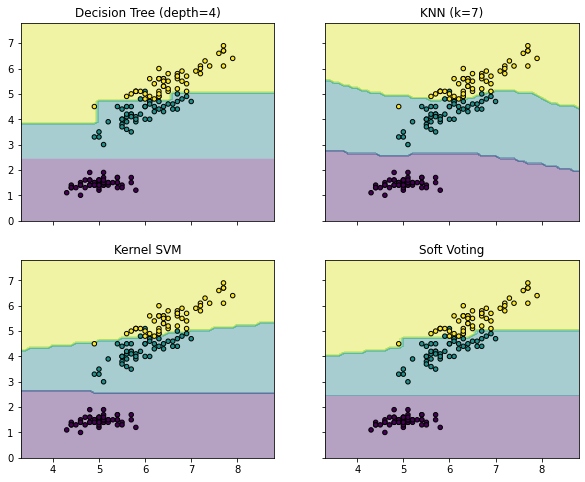

In [44]:
fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  print(Z[:5])
  Z = Z.reshape(xx.shape)
  print(Z.shape)
  ax[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  ax[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
  ax[idx[0], idx[1]].set_title(tt)

In [32]:
xx.ravel()

array([3.3, 3.4, 3.5, ..., 8.6, 8.7, 8.8])

In [33]:
yy.ravel()

array([0. , 0. , 0. , ..., 7.8, 7.8, 7.8])

In [34]:
np.c_[xx.ravel(), yy.ravel()].shape

(4424, 2)

In [35]:
xx.shape

(79, 56)

4424